## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

new_df.nunique()["Mouse ID"]

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

new_df.loc[new_df[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"].unique()[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

new_df[new_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


clean_df = new_df[new_df["Mouse ID"] != "g989"].reset_index()

clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df.count()["Mouse ID"]

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data = clean_df.groupby("Drug Regimen")

drug_table = drug_data.agg(Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),
                           Tumor_Vol_Median=("Tumor Volume (mm3)", np.median),
                           Tumor_Vol_Var=("Tumor Volume (mm3)", np.var),
                           Tumor_Vol_Stdev=("Tumor Volume (mm3)", np.std),
                           Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)
                            ).round(2)


drug_table



,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


drug_data2 = clean_df.groupby("Drug Regimen").agg(
Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),
Tumor_Vol_Median=("Tumor Volume (mm3)", np.median),
Tumor_Vol_Var=("Tumor Volume (mm3)", np.var),
Tumor_Vol_Stdev=("Tumor Volume (mm3)", np.std),
Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)).round(2)

drug_data2

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0, 0.5, 'Unique Count')

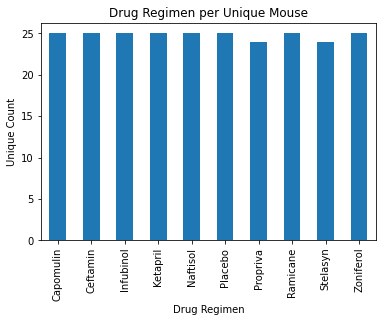

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
pandas_bar_plot = drug_data.nunique()["Mouse ID"]

ax = pandas_bar_plot.plot.bar(title="Drug Regimen per Unique Mouse")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Unique Count")

In [10]:
the_list = pandas_bar_plot.values.tolist()

array = np.array(the_list)

array

array([25, 25, 25, 25, 25, 25, 24, 25, 24, 25])

In [11]:
drug_names = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

Text(0, 0.5, 'Unique Count')

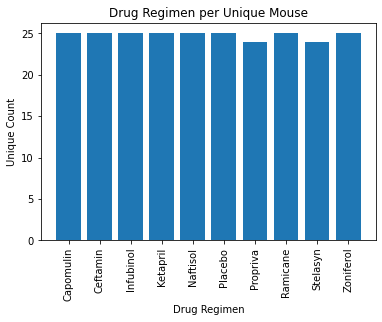

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

ypos = np.arange(len(drug_names))
tick_loc = [value for value in ypos]

plt.bar(ypos,array)
plt.xticks(tick_loc, drug_names, rotation="vertical")
plt.title("Drug Regimen per Unique Mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Count")

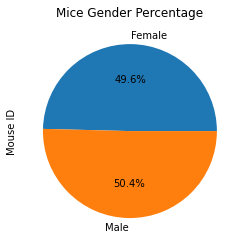

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ID_data = clean_df.groupby("Sex")

pandas_pie_plot = ID_data.nunique()["Mouse ID"]

pandas_pie_plot.plot(kind="pie", y="Sex",title="Mice Gender Percentage",autopct="%1.1f%%")

In [14]:
numbers = pandas_pie_plot.tolist()

<ipython-input-15-76d0d8d15209>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(slices, labels=labels,autopct="%1.1f%%")


Text(0.5, 1.0, 'Mice Gender Percentage')

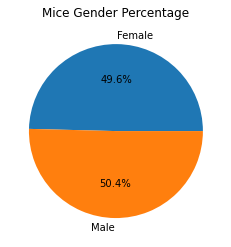

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

slices = [numbers]
labels = ["Female", "Male"]

plt.pie(slices, labels=labels,autopct="%1.1f%%")
plt.title("Mice Gender Percentage")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

print(clean_df["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drug_list_data = clean_df[clean_df["Drug Regimen"].isin(drug_list)]

drug_list_data.head()

45


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

max_tumor = drug_list_data.groupby(["Drug Regimen","Mouse ID"]).agg(Max_Tumor=("Tumor Volume (mm3)",lambda x: x.iloc[-1])).round(2)

# Create empty list to fill with tumor vol data (for plotting)

unstack_tumor = max_tumor.stack(level=0).unstack(level=0)

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

counter = 0

for drug in drug_list:
    quartiles = unstack_tumor[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if counter == 0:
        print("-----------------------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"Lower quartile of {drug} = {lowerq}")
    print(f"Upper quartile of {drug} = {upperq}")
    print(f"The interquartile range of {drug} = {iqr}")
    print(f"The the median of {drug} = {quartiles[0.5]} ")

   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
#Help
    # add subset 
    
#Help
    # Determine outliers using upper and lower bounds
    
    print(f"Any results under {lower_bound} in {drug} data could be considered outliers.")
    print(f"Any results over {upper_bound} in {drug} data could be considered outliers.")
    print("-----------------------------------------------------------------------")
    
    counter += 1

-----------------------------------------------------------------------
Capomulin IQR data is:
Lower quartile of Capomulin = 32.38
Upper quartile of Capomulin = 40.16
The interquartile range of Capomulin = 7.78
The the median of Capomulin = 38.13 
Any results under 20.71 in Capomulin data could be considered outliers.
Any results over 51.83 in Capomulin data could be considered outliers.
-----------------------------------------------------------------------
Ramicane IQR data is:
Lower quartile of Ramicane = 31.56
Upper quartile of Ramicane = 40.66
The interquartile range of Ramicane = 9.1
The the median of Ramicane = 36.56 
Any results under 17.91 in Ramicane data could be considered outliers.
Any results over 54.31 in Ramicane data could be considered outliers.
-----------------------------------------------------------------------
Infubinol IQR data is:
Lower quartile of Infubinol = 54.05
Upper quartile of Infubinol = 65.53
The interquartile range of Infubinol = 11.48
The the median

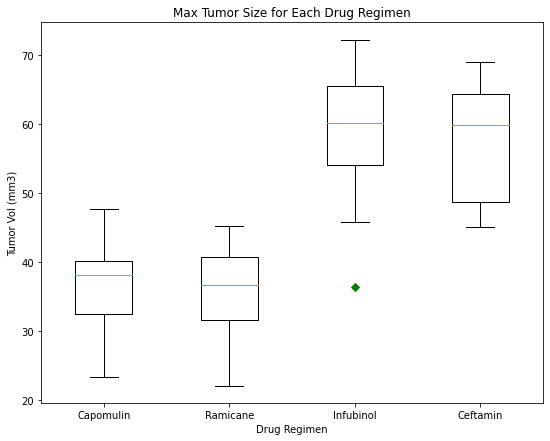

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(unstack_tumor[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title("Max Tumor Size for Each Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(boxplot_list,notch=0,sym="gD")
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and Scatter Plots

In [20]:
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

capomulin_data = capomulin.groupby(["Timepoint"]).agg(Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),
                                                      Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)).round(3)

capomulin_data.head(10)

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


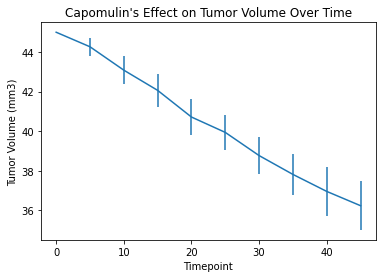

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


timepoint = list(capomulin_data.index.values)


plt.errorbar(timepoint,
             capomulin_data["Tumor_Vol_Mean"],
             yerr=capomulin_data["Tumor_Vol_SEM"],
             label="Time Series of Tumor Volume for Capomulin")
plt.title("Capomulin's Effect on Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")



plt.show()

In [22]:
volume_weight = capomulin.groupby(["Mouse ID"]).agg(Mouse_weight=("Weight (g)", np.mean),
                                                    Tumor_vol_mean=("Tumor Volume (mm3)", np.mean)).round(2)
volume_weight.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.96
b742,21,40.08
f966,17,36.51
g288,19,41.99
g316,22,44.61
i557,24,44.81
i738,20,39.14
j119,23,44.47
j246,21,43.22


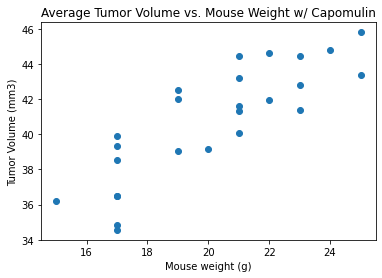

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(volume_weight["Mouse_weight"],volume_weight["Tumor_vol_mean"])
plt.title("Average Tumor Volume vs. Mouse Weight w/ Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(volume_weight["Mouse_weight"],volume_weight["Tumor_vol_mean"])
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")

The correlation coefficient between Mouse Weight and Average Tumor Volume is 0.84


R-squared = 0.8418558779004008
Regression line = (y = 0.95x + 21.56)


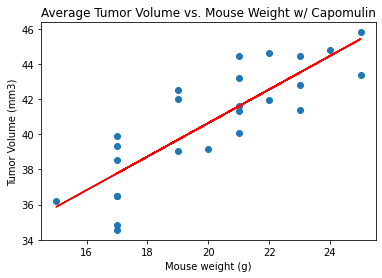

In [25]:
x_weight = volume_weight["Mouse_weight"]
y_weight = volume_weight["Tumor_vol_mean"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_weight)
regress_values = x_weight * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_weight,y_weight)
plt.plot(x_weight,regress_values,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight w/ Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Print out the r-squared value along with the plot.
print(f"R-squared = {rvalue}")
print(f"Regression line = ({line_eq})")

plt.show()